# Importing librarys and Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("processed_data_toDummies.csv")

In [84]:
df

Year Hobbyist  ConvertedComp                               Country  \
0      2017      Yes    43750.00000                        United Kingdom   
1      2017      Yes    51282.05128                               Denmark   
2      2017       No    25000.00000                                Israel   
3      2017      Yes   100000.00000                         United States   
4      2017      Yes    27000.00000                               Ukraine   
...     ...      ...            ...                                   ...   
33595  2020      Yes    75396.00000                                 India   
33597  2020      Yes      369.00000  Venezuela, Bolivarian Republic of...   
33598  2020       No    38484.00000                               Hungary   
33599  2020      Yes   140000.00000                         United States   
33600  2020      Yes   129718.00000                               Germany   

                 EdLevel          Employment  JobSat  \
0      Bachelor's degree  Employed_full_time     4.0   
1         Primary_school  Employed part-time    10.0   
2         Primary_school  Employed_full_time     6.0   
3         Primary_school  Employed_full_time     5.0   
4        Master's degree  Employed_full_time     7.0   
...                  ...                 ...     ...   
33595  Bachelor's degree  Employed_full_time     8.0   
33597     Primary_school  Employed_full_time     2.0   
33598    Master's degree          freelancer     8.0   
33599    Doctoral degree  Employed_full_time     8.0   
33600    Master's degree          freelancer     8.0   

                       UndergradMajor  YearsCodePro  \
0                    Computer science           2.0   
1                    Computer science           3.0   
2                    Computer science           4.0   
3                    Computer science          15.0   
4                    Computer science           5.0   
...                               ...           ...   
33595  Another engineering discipline          18.0   
33597                Computer science          27.0   
33598                      Humanities          12.0   
33599  Another engineering discipline          12.0   
33600  Another engineering discipline           9.0   

       Data_scientist_or_machine_learning_specialist  Database administrator  \
0                                                  1                       1   
1                                                  1                       0   
2                                                  1                       0   
3                                                  0                       1   
4                                                  0                       1   
...                                              ...                     ...   
33595                                              0                       0   
33597                                              0                       1   
33598                                              0                       0   
33599                                              1                       0   
33600                                              0                       1   

       Data_or_business_analys       pc1       pc2  2_clusters  
0                          0.0  0.108538 -1.069715           1  
1                          0.0  1.413807  0.333366           0  
2                          0.0  1.420486 -0.642092           0  
3                          0.0 -1.771740  0.915977           1  
4                          0.0 -1.317604 -0.936105           1  
...                        ...       ...       ...         ...  
33595                      0.0 -0.016191  1.393236           0  
33597                      0.0 -1.656963 -0.329231           1  
33598                      1.0  0.765974  0.457386           0  
33599                      1.0  1.977852  2.525202           0  
33600                      0.0 -1.093602  1.283783           1  

[32320

# Checking nun values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33601 entries, 0 to 33600
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           33601 non-null  int64  
 1   Hobbyist                                       33601 non-null  object 
 2   ConvertedComp                                  33601 non-null  float64
 3   Country                                        33601 non-null  object 
 4   EdLevel                                        33138 non-null  object 
 5   Employment                                     33561 non-null  object 
 6   JobSat                                         33526 non-null  float64
 7   OrgSize                                        31904 non-null  object 
 8   UndergradMajor                                 30515 non-null  object 
 9   YearsCodePro                                   335

# Cecking correlation in dataset

<AxesSubplot:>

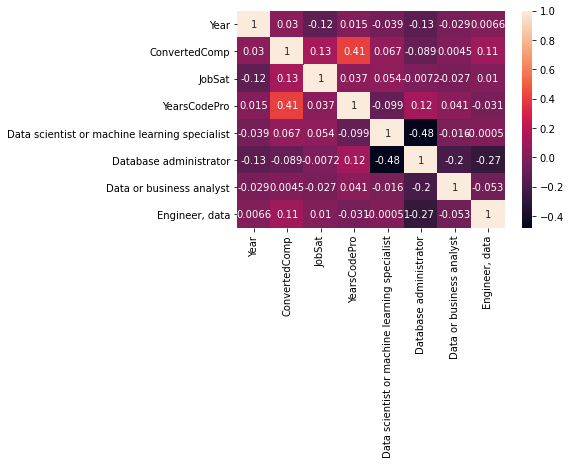

In [5]:
sns.heatmap(df.corr(), annot=True)


# Cleaning Columns

In [6]:
df.rename(columns = {"Data scientist or machine learning specialist": "Data_scientist_or_machine_learning_specialist"}, inplace = True)
df.rename(columns = {"Engineer, data": "Engineer_data"}, inplace = True)
df.rename(columns = {"Data or business analyst": "Data_or_business_analys"}, inplace = True)


# Handling nan values

In [9]:
df.EdLevel.replace(np.nan, "no_answer", inplace = True)
df.YearsCodePro.replace(np.nan, 9, inplace = True)
df.Employment.replace(np.nan, "Employed_full_time", inplace = True)
df.JobSat.replace(np.nan, 6, inplace = True)
df.UndergradMajor.replace(np.nan, "Computer science", inplace = True)
df.YearsCodePro.replace(np.nan, 9, inplace = True)
df.Data_or_business_analys.replace(np.nan, 0, inplace = True)

# Handling values

In [10]:
df.replace({'Employment': "Employed full-time"}, "Employed_full_time", inplace = True)
df.replace({'Employment': "Independent contractor, freelancer, or self-employed"}, "freelancer", inplace = True)
df.replace({'EdLevel': "Some college/university study without earning a bachelor's degree"}, "Primary_school",
           inplace = True)
df.replace({'EdLevel': "Primary/elementary school"}, "Primary_school", inplace = True)
df.replace({'EdLevel': "I prefer not to answer"}, "no_answer", inplace = True)
df.replace({'EdLevel': "I never completed any formal education"}, "no_education", inplace = True)
df.replace({'Hobbyist': "Yes, I program as a hobby"},"Yes", inplace = True)
df.replace({'Hobbyist': "Yes, I contribute to open source projects"},"Yes", inplace = True)
df.replace({'Hobbyist': "Yes, both"},"Yes", inplace = True)



# Dropping columns

In [11]:
df.drop(columns = "Engineer_data", inplace = True)
df.drop(columns = "OrgSize", inplace = True)


# Handling outliers

<AxesSubplot:xlabel='ConvertedComp'>

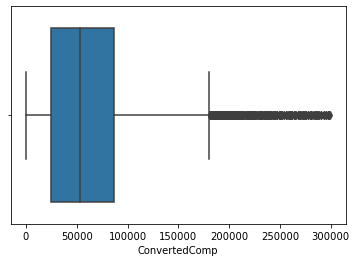

In [15]:
sns.boxplot(df.ConvertedComp)

In [16]:
df.loc[df.ConvertedComp > 170000]
drop_box_ConvertedComp = df.loc[df.ConvertedComp > 170000].index
df.drop(drop_box_ConvertedComp, inplace = True)

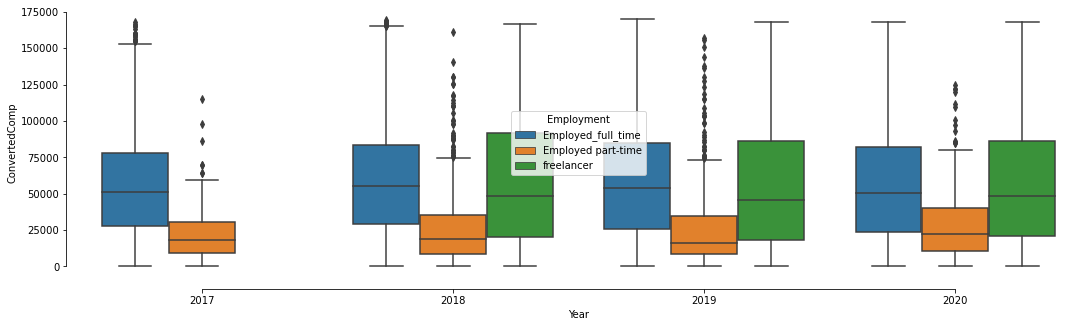

In [19]:
df = df.loc[(df['ConvertedComp'] < 170000) & (df['ConvertedComp'] > 0),:]
# plot
fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x="Year", y="ConvertedComp",
            hue = 'Employment',
            data=df,
            ax = ax)
sns.despine(offset=10, trim=True)
plt.show()

# EDA

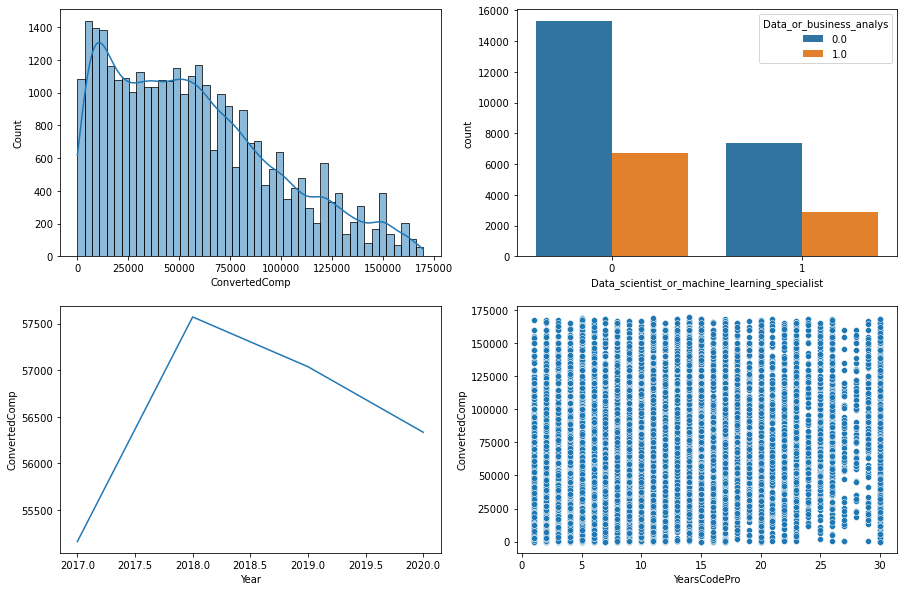

In [20]:
fig, ax = plt.subplots(2,2, figsize=(15,10))
sns.histplot(df.ConvertedComp, kde=True, ax=ax[0,0])
sns.countplot(x='Data_scientist_or_machine_learning_specialist', data=df, hue='Data_or_business_analys', ax=ax[0,1])
sns.lineplot(x='Year', y='ConvertedComp', data=df[df.Year > 1995], ci=None, ax=ax[1,0])
sns.scatterplot(x='YearsCodePro', y='ConvertedComp', data=df, ax=ax[1,1]);

# PCA

### Sklearn

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
df_nums = df.select_dtypes("number")
scaler = StandardScaler()
df_nums_scaler = scaler.fit_transform(df_nums)
pca = PCA()
pc_values = pca.fit_transform(df_nums_scaler)
evr = pca.explained_variance_ratio_
evr.cumsum()

array([0.22459435, 0.42864912, 0.60144721, 0.73409267, 0.85699604,
       0.93748729, 1.        ])

### Ploting PCA

<AxesSubplot:>

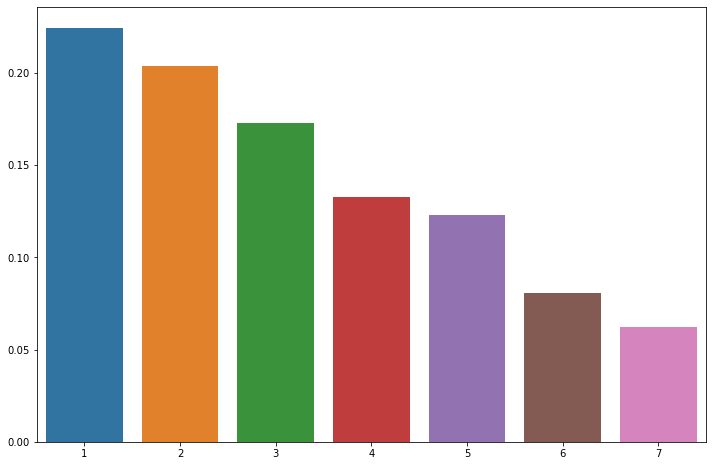

In [24]:
plt.figure(figsize = (12,8))

sns.barplot(x = [1,2,3,4,5,6,7], y =evr)

# PCA with 5 compoments

In [91]:
df_nums = df.select_dtypes("number")
scaler = StandardScaler()
df_nums_scaler = scaler.fit_transform(df_nums)
pca = PCA(5)
pc_values = pca.fit_transform(df_nums_scaler)
evr = pca.explained_variance_ratio_


<AxesSubplot:>

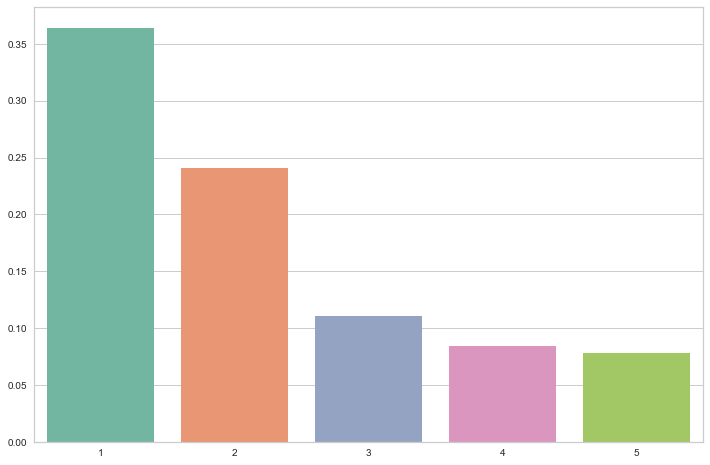

In [92]:
plt.figure(figsize = (12,8))

sns.barplot(x = [1,2,3,4,5], y =evr)

<AxesSubplot:>

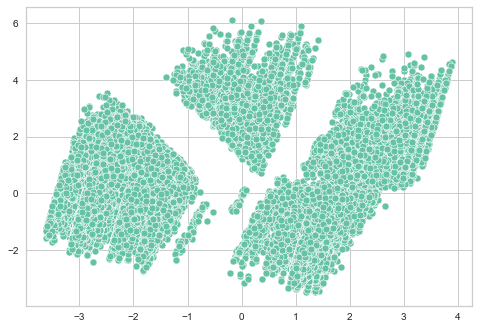

In [103]:
sns.scatterplot(x = pc_values[:,0], y = pc_values[:,1])

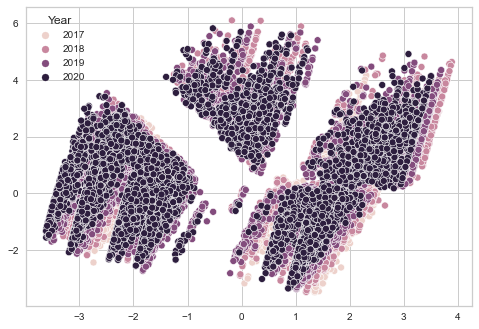

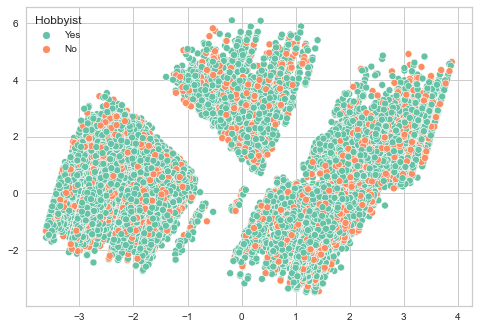

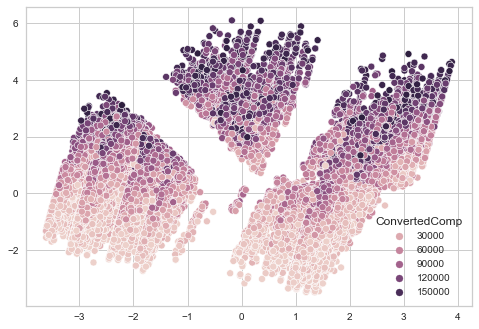

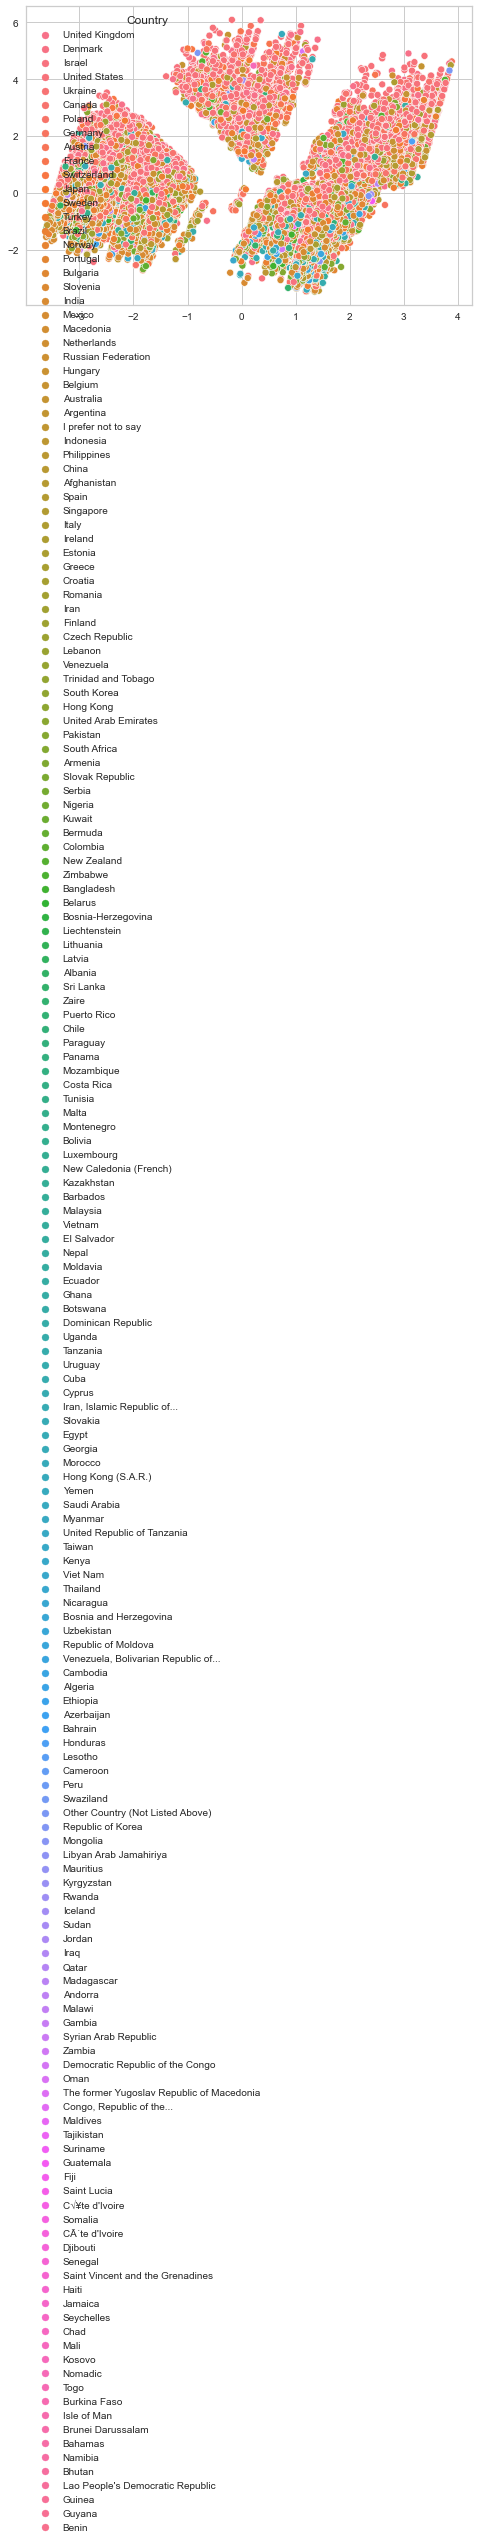

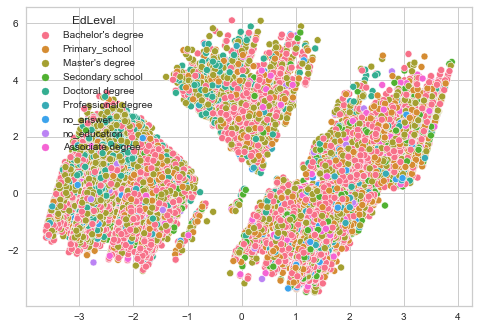

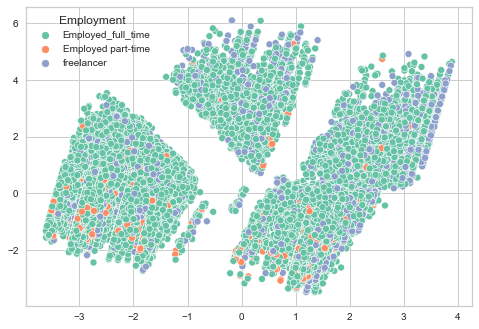

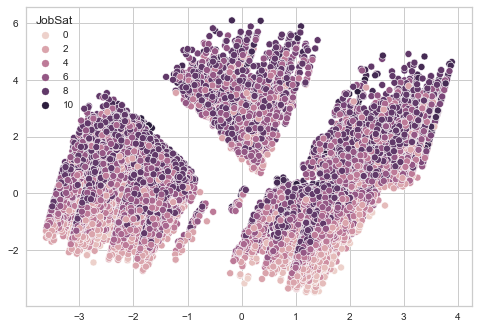

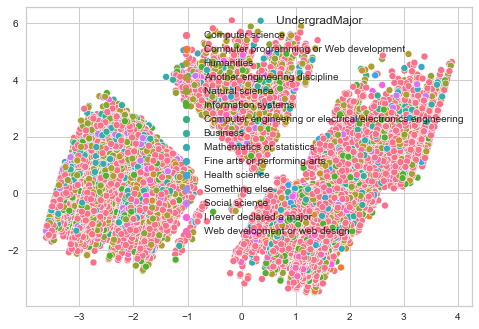

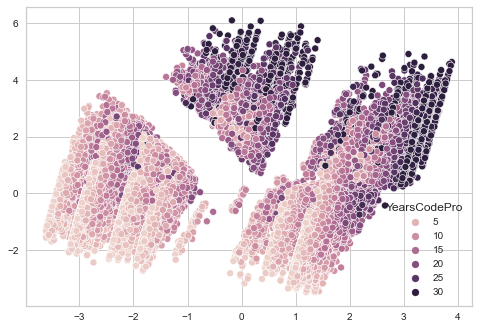

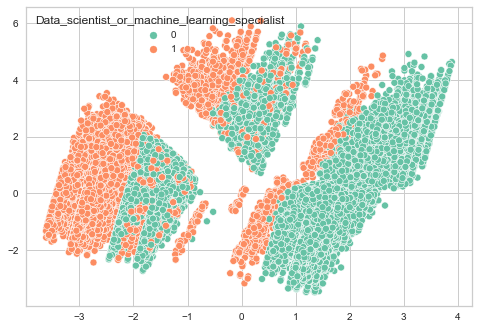

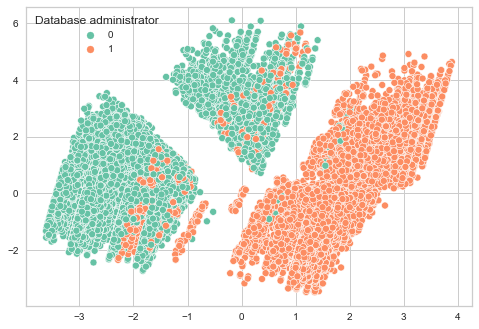

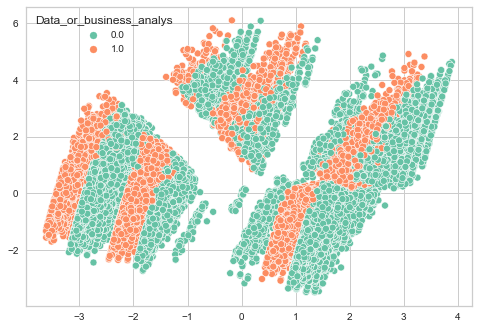

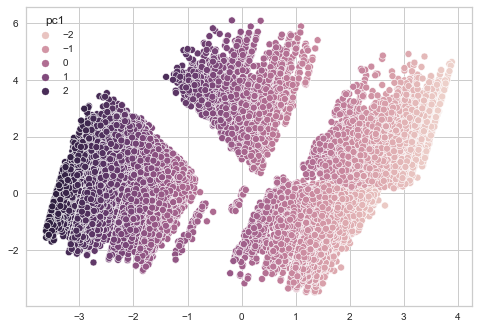

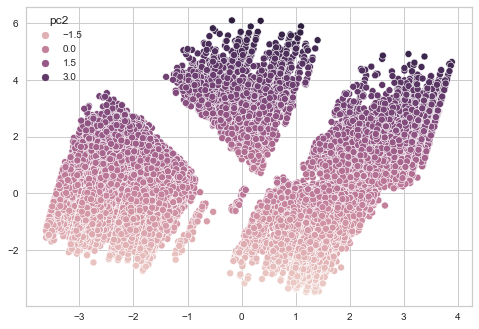

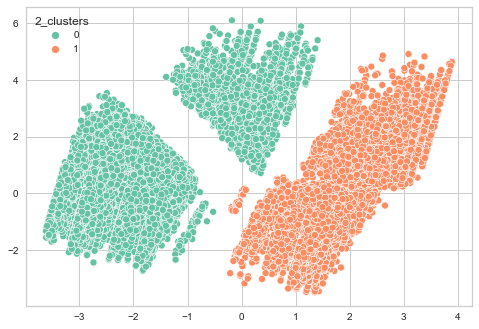

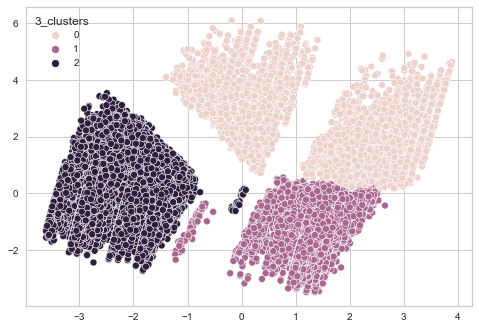

In [100]:
for i in df.columns:

    sns.scatterplot(data = df,x = pc_values[:,0], y = pc_values[:,1], hue = i)
    plt.show()

# Making pc1 & pc2

In [26]:
pc1 = pc_values[:,0]
pc2 = pc_values[:,1]
df["pc1"] = pc1
df["pc2"] = pc2

# Ploting in scatterplot

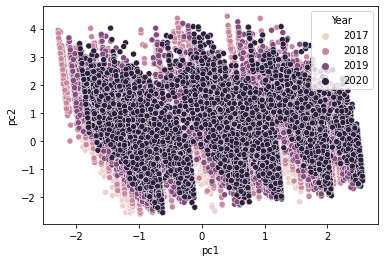

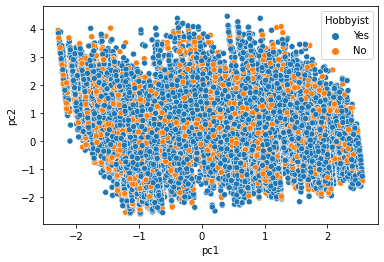

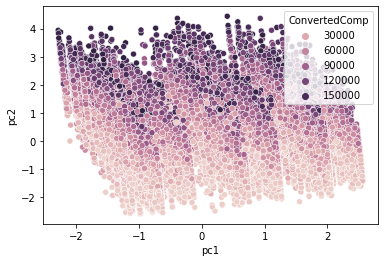

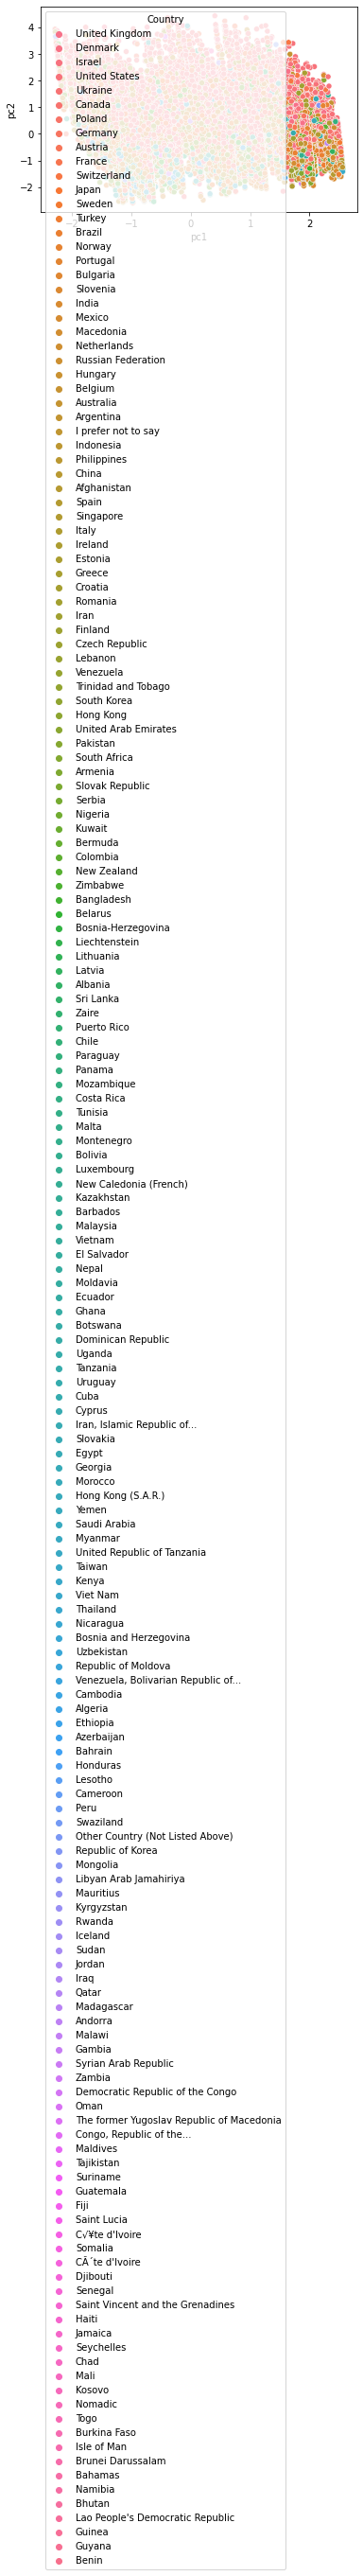

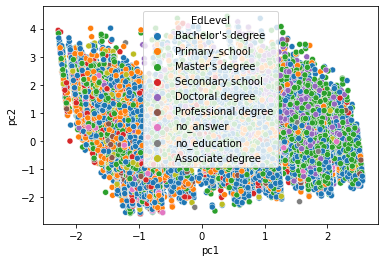

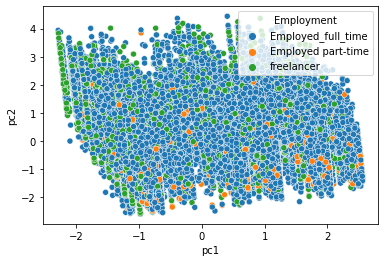

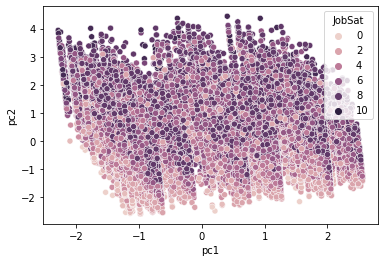

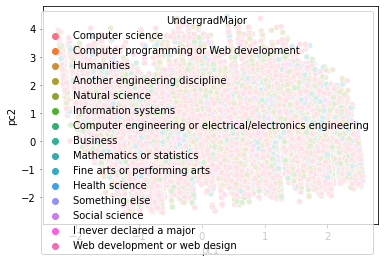

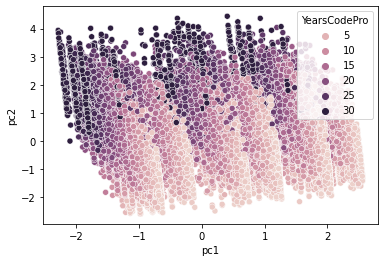

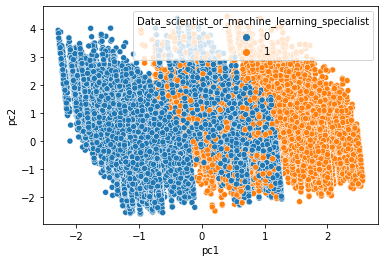

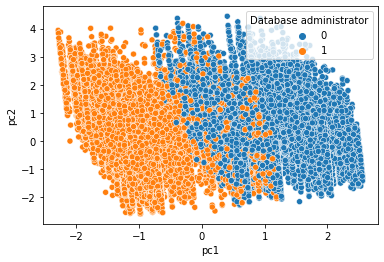

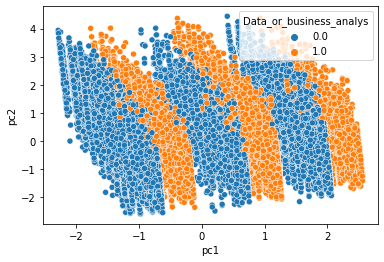

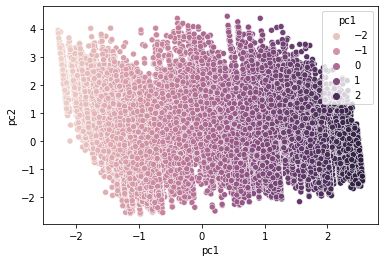

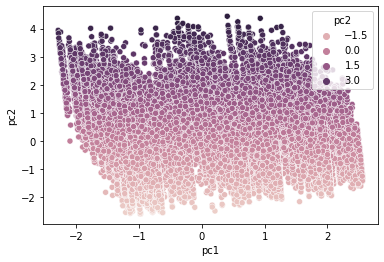

In [30]:
for i in df.columns:
    sns.scatterplot(data = df, x= "pc1", y = "pc2", hue = i)
    plt.show()

# K-means

### Sklearn

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [96]:
df_nums = df.select_dtypes("number")
scaler = StandardScaler()
num_scaled = scaler.fit_transform(df_nums)
kmeans = KMeans()

In [85]:
inertia_lst = []

for i in range(1,9):
    kmeans = KMeans(n_clusters = i)
    
    kmeans.fit(num_scaled)
    
    inertia = kmeans.inertia_
    
    print(inertia)
    
    inertia_lst.append(inertia)

290879.999999999
220757.14211550326
183053.21547481854
163496.2024291221
150385.4298282296
140347.90948423214
132380.0404242695
125242.81785988196


In [34]:
inertia_lst = pd.Series(inertia_lst)

In [35]:
inertia_lst.index + 1

RangeIndex(start=1, stop=6, step=1)

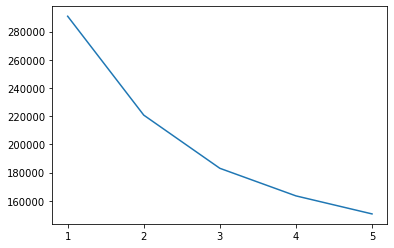

In [39]:
sns.lineplot(x = inertia_lst.index + 1, y = inertia_lst.values)
plt.xticks([1,2,3,4,5])
plt.show()

## KEIbowVisualizer from yellowbrick

- "Decides" where the elbow is
- Not necessarily the best choice

In [40]:
from yellowbrick.cluster import KElbowVisualizer

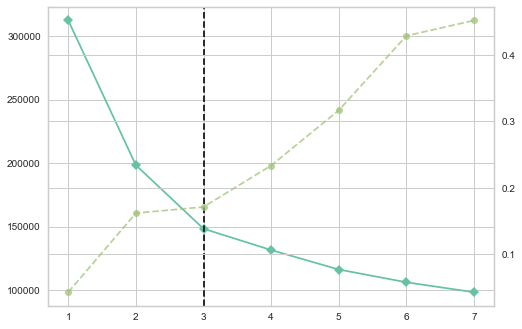

In [97]:
elbow_viz = KElbowVisualizer(KMeans(),k = (1,8))
elbow_viz.fit(pc_values)

plt.show()

## Getting cluster labels

### 2 Clusters

In [87]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(num_scaled)

KMeans(n_clusters=3)

In [88]:
df["3_clusters"] = kmeans.labels_

In [90]:
df.groupby("3_clusters").mean()

Year  ConvertedComp    JobSat  YearsCodePro  \
3_clusters                                                       
0           2018.744226  101256.417768  6.634689     17.906901   
1           2018.599683   37134.826614  5.884670      6.273220   
2           2018.889910   51165.840921  6.036370      5.516416   

            Data_scientist_or_machine_learning_specialist  \
3_clusters                                                  
0                                                0.195409   
1                                                0.045314   
2                                                0.629292   

            Database administrator  Data_or_business_analys       pc1  \
3_clusters                                                              
0                         0.679042                 0.335837 -0.745667   
1                         0.999332                 0.136694 -0.983878   
2                         0.062952                 0.421762  1.284035   

                 pc2  2_clusters  
3_clusters                        
0           1.611509    0.639082  
1          -0.814489    0.994909  
2          -0.121416    0.001732

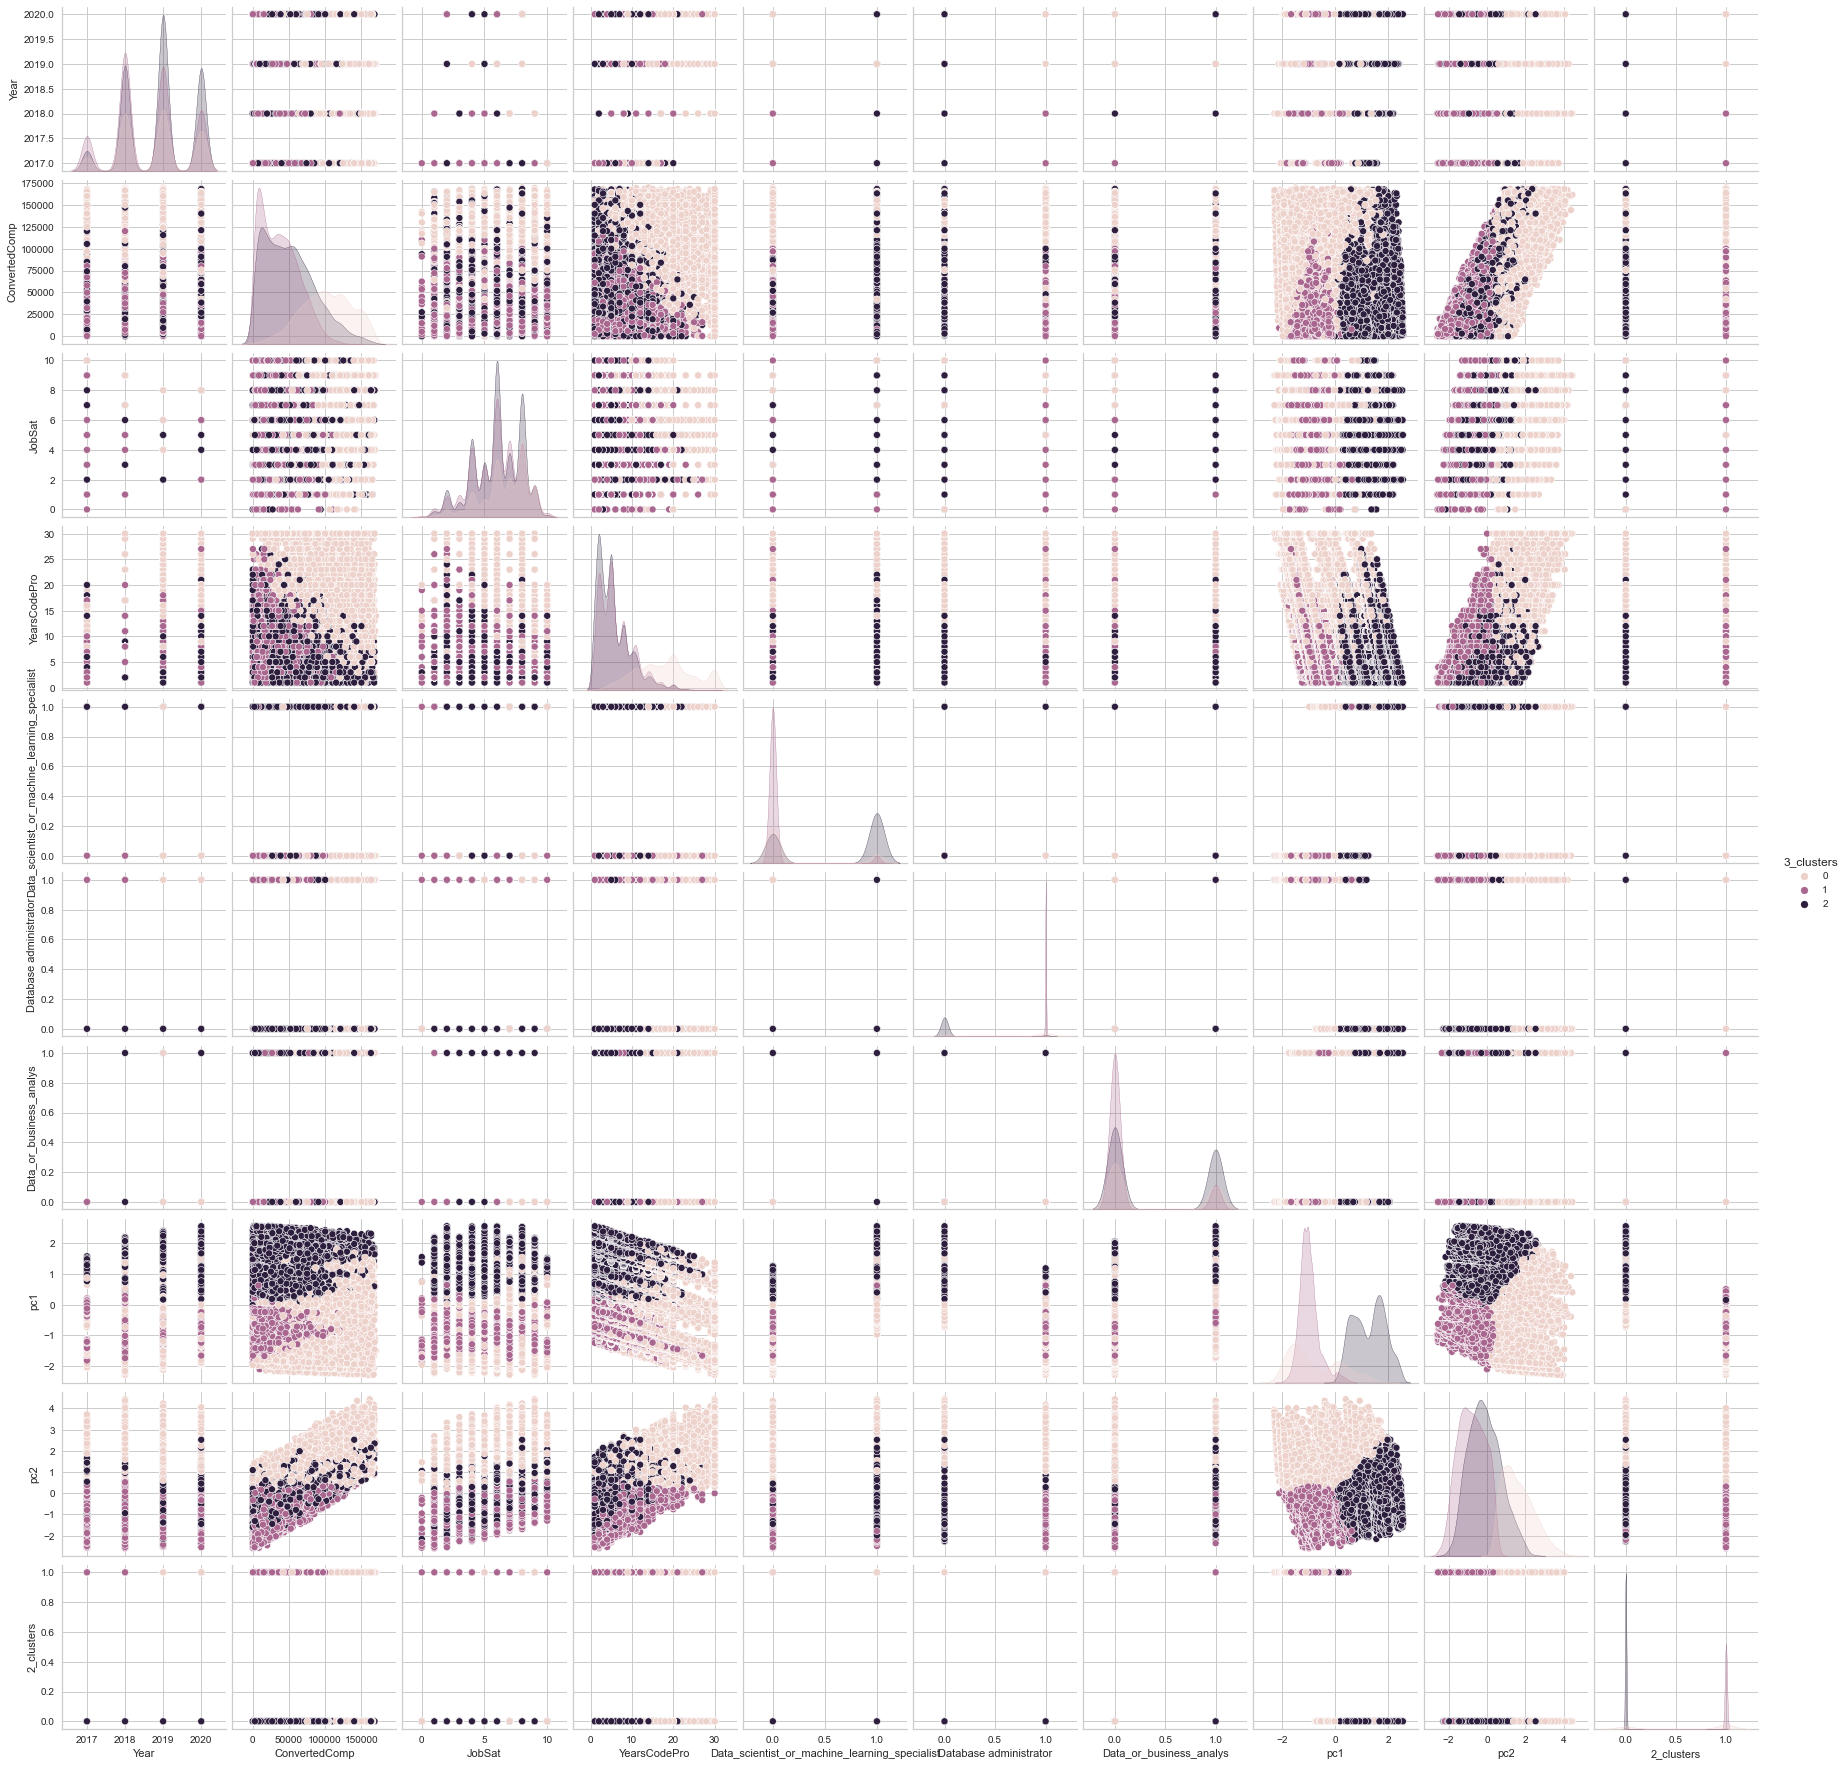

In [101]:
sns.pairplot(df, hue = "3_clusters")

# Counting workers per Country in dataset top 20

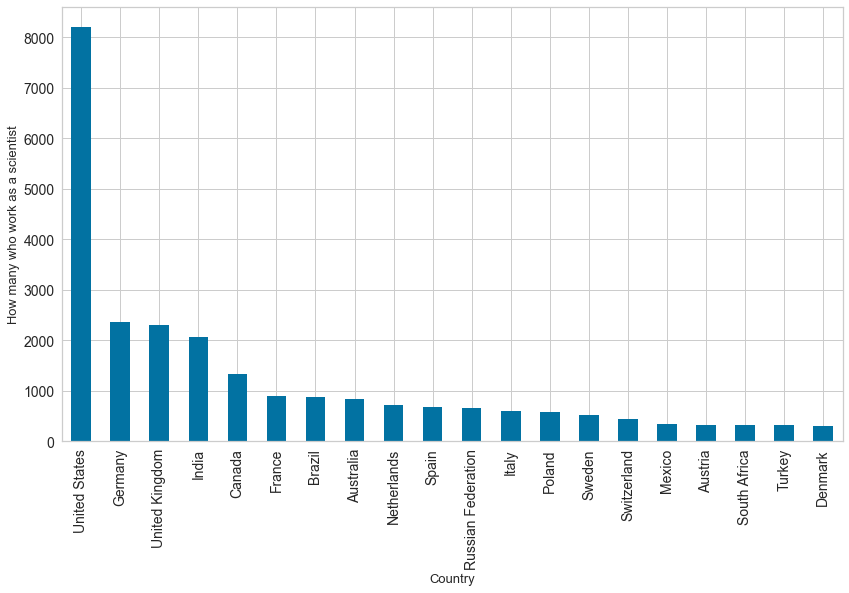

In [45]:
lon_per_con = df.groupby("Country").ConvertedComp.count().nlargest(n=20)
lon_per_con.plot(kind = "bar", figsize = (14,8), fontsize=14)
plt.xlabel("Country", fontsize = 13)

plt.ylabel("How many who work as a scientist", fontsize = 13)
plt.show()


# Least working Countrys in dataset

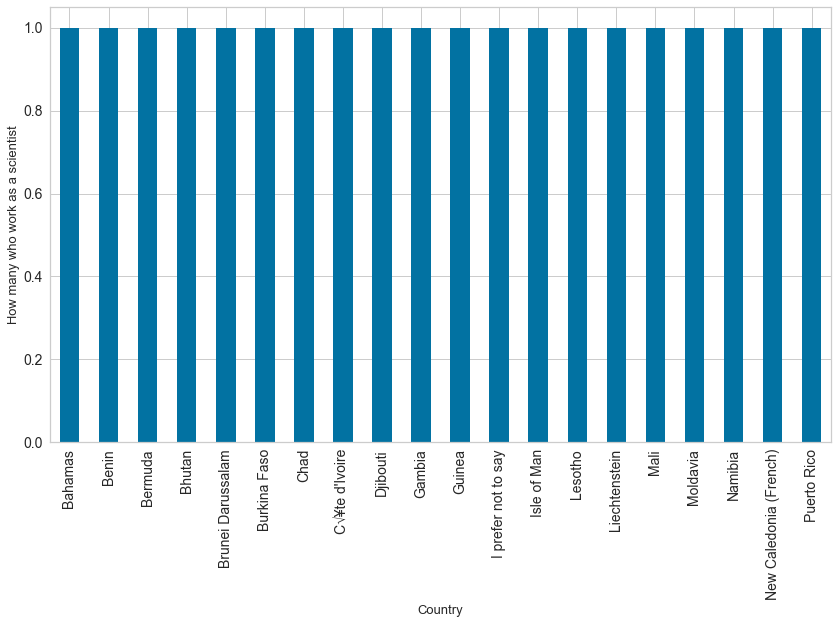

In [46]:
lon_per_con3 = df.groupby("Country").ConvertedComp.count().nsmallest(n=20)
lon_per_con3.plot(kind = "bar", figsize = (14,8), fontsize=14)
plt.xlabel("Country", fontsize = 13)

plt.ylabel("How many who work as a scientist", fontsize = 13)
plt.show()


# Countrys who earn the Most on average

In [49]:
sns.set_palette("Set2")

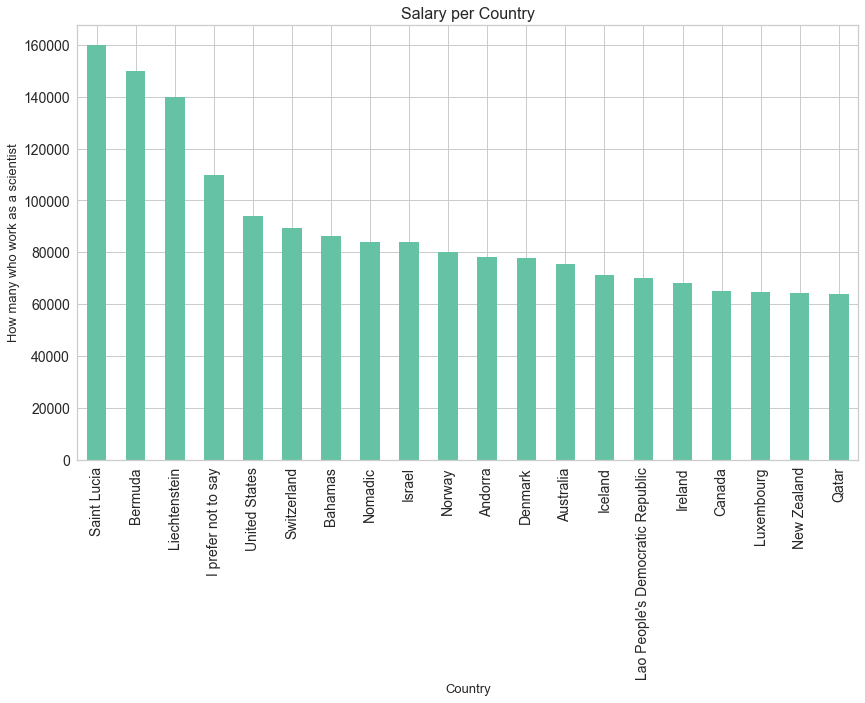

In [50]:
lon_per_con2 = df.groupby("Country").ConvertedComp.mean().nlargest(n=20)
lon_per_con2.plot(kind = "bar", figsize = (14,8), fontsize=14)
plt.xlabel("Country", fontsize = 13)

plt.ylabel("How many who work as a scientist", fontsize = 13)
plt.title("Salary per Country", fontsize = 16)
plt.show()

# Countrys who earn the least on average

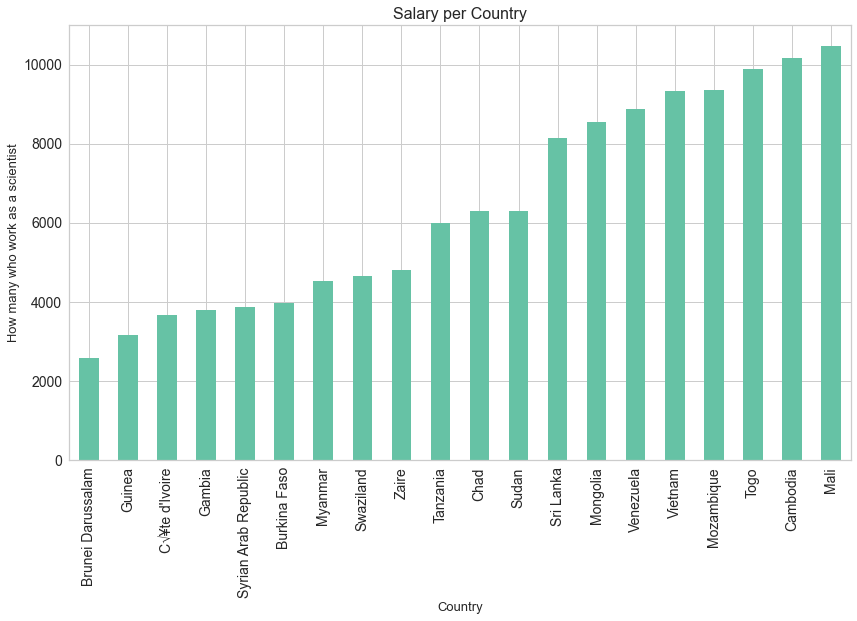

In [51]:
lon_per_con4 = df.groupby("Country").ConvertedComp.mean().nsmallest(n=20)
lon_per_con4.plot(kind = "bar", figsize = (14,8), fontsize=14)
plt.xlabel("Country", fontsize = 13)

plt.ylabel("How many who work as a scientist", fontsize = 13)
plt.title("Salary per Country", fontsize = 16)
plt.show()

# USA
### Salaray distribution

In [72]:
usa = df.loc[df.Country == "United States"]


<AxesSubplot:xlabel='ConvertedComp', ylabel='Count'>

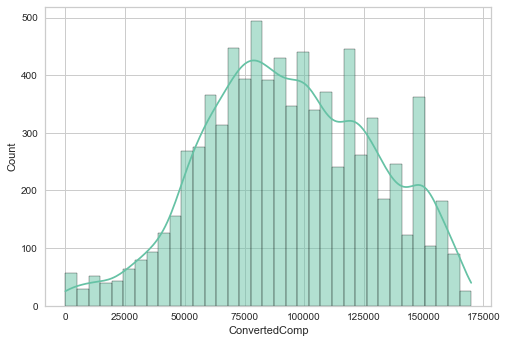

In [62]:
sns.histplot(usa.ConvertedComp, kde=True)

### The effect of years coded on Salary

In [63]:
temp = usa.groupby("YearsCodePro").ConvertedComp.mean()

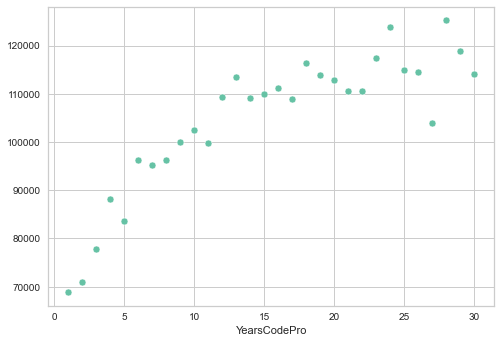

In [67]:
sns.scatterplot(y = temp.values, x = temp.index)
plt.show()

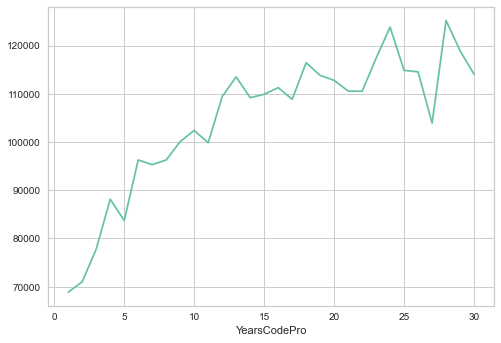

In [68]:
usa.groupby("YearsCodePro").ConvertedComp.mean().plot()
plt.show()

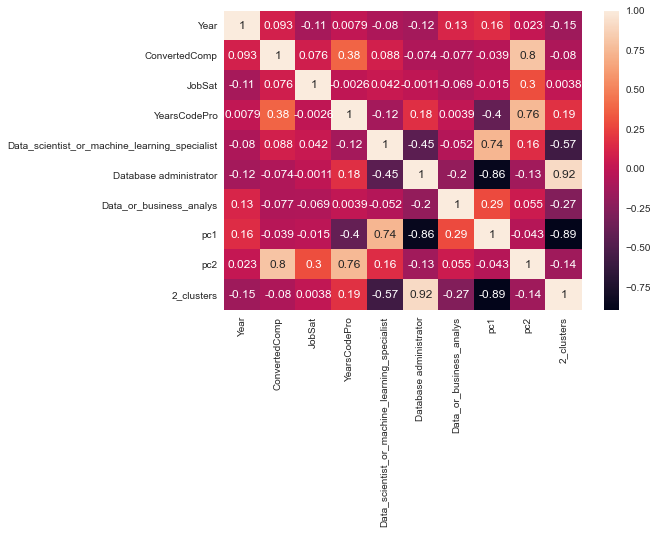

In [82]:
sns.heatmap(usa.corr(), annot=True)
plt.show()


# EU 
### Salaray distribution

In [73]:
eu = df.loc[df.Country.isin(["Germany", "United Kingdom", "France", "Netherlands", "Italy", "Sweden", "Polen"])]


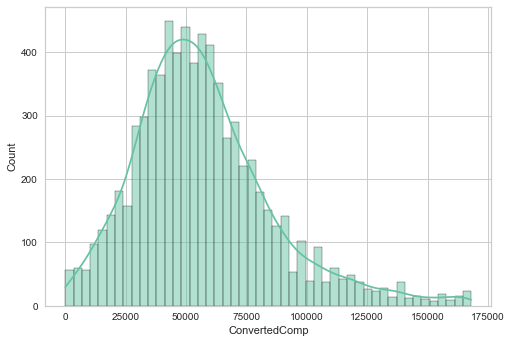

In [70]:
sns.histplot(eu.ConvertedComp, kde=True)
plt.show()


### The effect of years coded on Salary

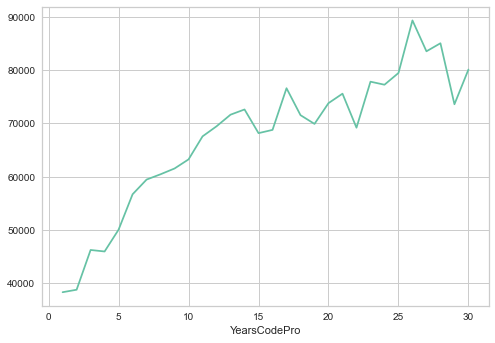

In [71]:
eu.groupby("YearsCodePro").ConvertedComp.mean().plot()
plt.show()

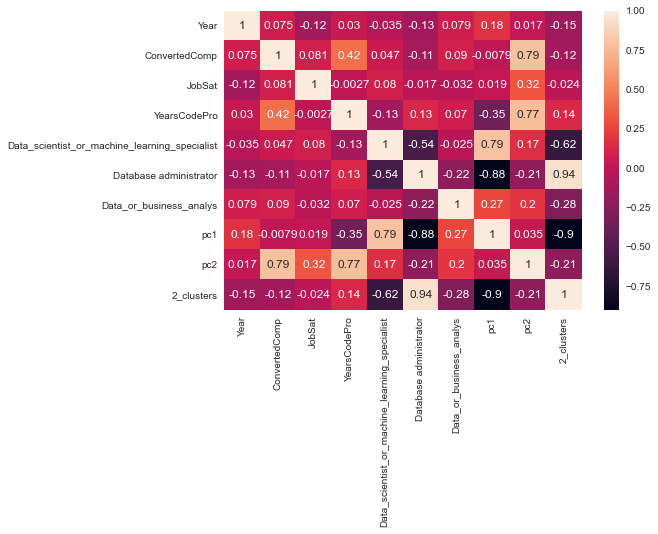

In [80]:
sns.heatmap(eu.corr(), annot=True)
plt.show()


# USA vs EU

In [74]:
eu_usa = df.loc[df.Country.isin(["Germany", "United Kingdom", "France", "Netherlands", "Italy", "Sweden", "Polen",
                                "United States"])]


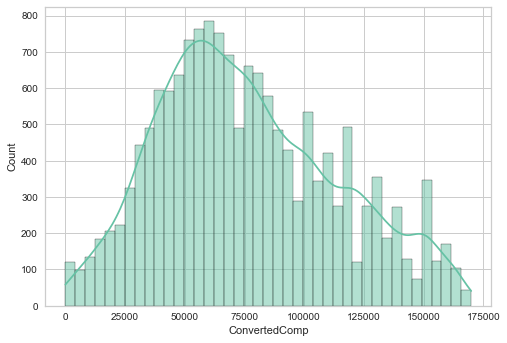

In [76]:
sns.histplot(eu_usa.ConvertedComp, kde=True)
plt.show()

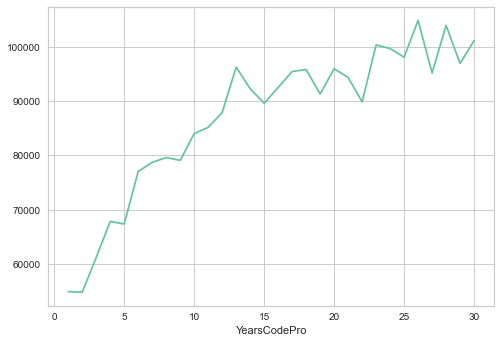

In [78]:
eu_usa.groupby("YearsCodePro").ConvertedComp.mean().plot()
plt.show()

In [57]:
usa.ConvertedComp.mean()

93820.90477932211

In [58]:
eu.ConvertedComp.mean()

57072.70287066081

In [59]:
eu_usa.ConvertedComp.mean()

76380.16248598591

<AxesSubplot:>

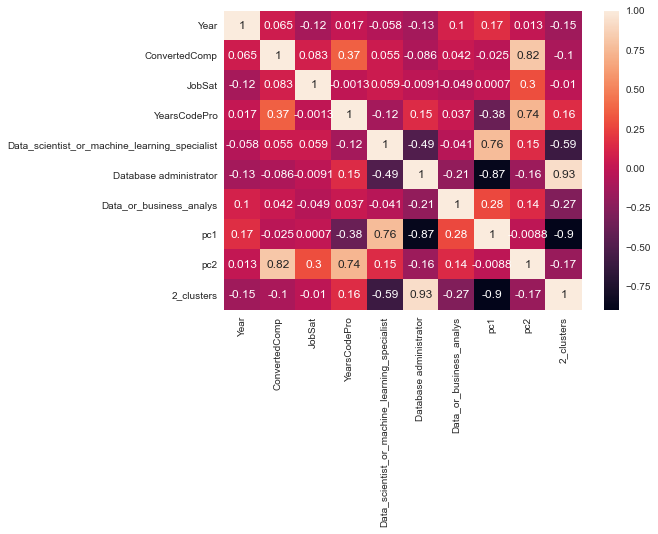

In [79]:
sns.heatmap(eu_usa.corr(), annot=True)


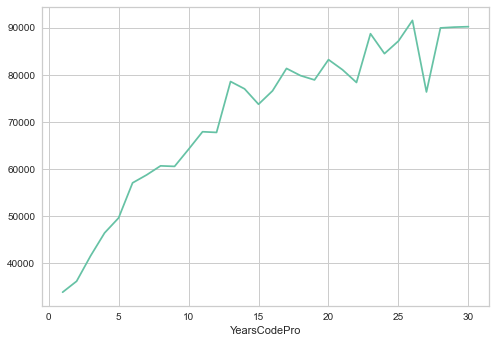

In [121]:
df.groupby("YearsCodePro").ConvertedComp.mean().plot()
plt.show()

# Supervised Machine Learning

### X & y

In [109]:
target_var = "ConvertedComp"

X = df.drop(columns = target_var, axis = 1 )

y = df[target_var]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

## Pipeline for Preprocessing the data


In [110]:
from sklearn.pipeline import make_pipeline

## Sklearn for preprocessing the data


In [111]:
#impute missing values (NaNs)
from sklearn.impute import SimpleImputer

# scaling 
from sklearn.preprocessing import StandardScaler

# onehotencoder, creates dummies (compare to pd.get_dummies)
from sklearn.preprocessing import OneHotEncoder

## preprocessing for categorical columns

In [112]:
cat_trans = make_pipeline(SimpleImputer(strategy = "constant", fill_value = "missing"),
             OneHotEncoder(handle_unknown = "ignore"))

## Preprocessing for numerical columns

In [113]:
num_trans = make_pipeline(SimpleImputer(strategy = "median"),
             StandardScaler())

In [114]:
num_cols = X.select_dtypes("number").columns
cat_cols = X.select_dtypes("object").columns

## Make column transformer

In [115]:
from sklearn.compose import make_column_transformer

preprocessor = make_column_transformer(
(num_trans, num_cols),
(cat_trans, cat_cols))

In [116]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Year', 'JobSat', 'YearsCodePro', 'Database administrator'], dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['Hobbyist', 'Country', 'EdLevel', 'Employment', 'Undergr

In [117]:
X_train = preprocessor.transform(X_train)

## Model selection

In [118]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeRegressor


from sklearn.ensemble import RandomForestRegressor


from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression

In [119]:
regressors = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
]

from sklearn.model_selection import cross_val_score

for i in regressors:
    cv_result = cross_val_score(i, X_train, y_train, cv = 5)
    
    print(i, cv_result)
    print(i, cv_result.mean())
    print("")

LinearRegression() [0.5858969  0.61252356 0.60824451 0.60972282 0.59578314]
LinearRegression() 0.6024341855039038

DecisionTreeRegressor() [0.27581735 0.30387597 0.28245592 0.30675278 0.29007995]
DecisionTreeRegressor() 0.2917963949631387

RandomForestRegressor() [0.54594372 0.56450274 0.57199329 0.56558782 0.56160584]
RandomForestRegressor() 0.5619266811846411

KNeighborsRegressor() [0.4101909  0.46022847 0.43313883 0.46129018 0.44028862]
KNeighborsRegressor() 0.4410274002754696

